In [1]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import torch
import scipy.stats as stats
import seaborn as sns
import matplotlib
plt.style.use('default.mplstyle')


# Directory and lists of datasets and models.
dataset_list = [
    "Bhuvaneshwari/intent_classification",
    "marksverdhei/clickbait_title_classification",
    "sst2",
    "legacy-datasets/banking77",
    "PriyaPatel/Bias_identification",
    "emotion",
    "ucirvine/sms_spam",
    "medical",
    "rotten_tomatoes",
    "common_sense",
    "climatebert/climate_sentiment",
    "imdb",
]

model_list = [
    "Qwen/Qwen2-0.5B",
    "Qwen/Qwen2-1.5B",
    "Qwen/Qwen2-7B",
    "apple/OpenELM-270M",
    "apple/OpenELM-450M",
    "apple/OpenELM-1_1B",
    "apple/OpenELM-3B",
    "meta-llama/Meta-Llama-3-8B"
]

# Define x-axis values
x_vals = np.arange(0.05, 1.0, 0.05)
epsilon = 1e-3


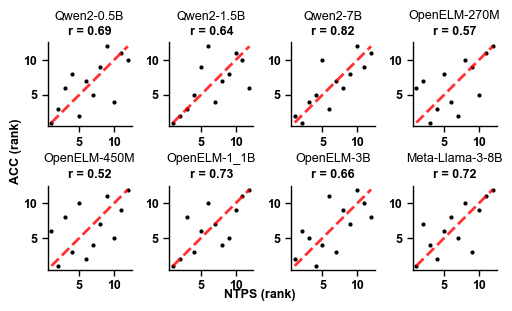

In [2]:
with open("Fig2_1.pkl", "rb") as f:
    Fig2_1 = pickle.load(f)
fig, axs = plt.subplots(2, 4, figsize=(5.0, 3.0))
axs = axs.flatten()

for i_model, model in enumerate(model_list):
    ax = axs[i_model]

    align_scores = []
    metrics = []
    for dataset in dataset_list:
        align_scores.append(Fig2_1[model][dataset]['align_score'])
        metrics.append(Fig2_1[model][dataset]['metric_data'])

    align_scores = np.array(align_scores)
    metrics = np.array(metrics)
    
    align_scores = stats.rankdata(align_scores)
    metrics = stats.rankdata(metrics)

    ax.scatter(align_scores, metrics, label=model, s=4, color='black')
    spearman_corr, p_value = stats.spearmanr(align_scores, metrics)
    ax.set_title(f"{model.split('/')[-1]}", y=1.18, fontsize=9)
    ax.text(0.5, 1.05, f"r = {spearman_corr:.2f}", transform=ax.transAxes, ha="center", va="bottom", fontsize=9, clip_on=False)
    x_fit = np.linspace(min(align_scores), max(align_scores), 100)
    y_fit= x_fit
    # y_fit = slope * x_fit + intercept
    ax.plot(x_fit, y_fit, linestyle='--', color='red', alpha=0.8)
    ax.set_aspect('equal', adjustable='box')

fig.text(0.5, 0.0, "NTPS (rank)", ha="center", va="bottom", fontsize=9)
fig.text(0.0, 0.5, "ACC (rank)", ha="left", va="center", rotation="vertical", fontsize=9)
plt.tight_layout()
plt.show()

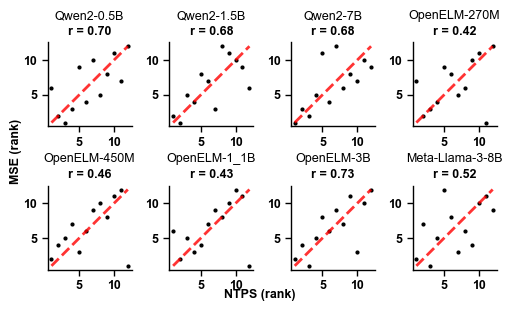

In [3]:
with open("Fig2_2.pkl", "rb") as f:
    Fig2_2 = pickle.load(f)
fig, axs = plt.subplots(2, 4, figsize=(5.0, 3.0))

axs = axs.flatten()

for i_model, model in enumerate(model_list):
    ax = axs[i_model]

    align_scores = []
    metrics = []
    for dataset in dataset_list:
        align_scores.append(Fig2_2[model][dataset]['align_score'])
        metrics.append(Fig2_2[model][dataset]['metric_data'])

    align_scores = np.array(align_scores)
    metrics = np.array(metrics)
    
    align_scores = stats.rankdata(align_scores)
    metrics = stats.rankdata(metrics)
    metrics = max(metrics) - metrics + 1

    ax.scatter(align_scores, metrics, label=model, s=4, color='black')
    spearman_corr, p_value = stats.spearmanr(align_scores, metrics)
    ax.set_title(f"{model.split('/')[-1]}", y=1.18, fontsize=9)
    ax.text(0.5, 1.05, f"r = {spearman_corr:.2f}", transform=ax.transAxes, ha="center", va="bottom", fontsize=9, clip_on=False)
    x_fit = np.linspace(min(align_scores), max(align_scores), 100)
    y_fit=  x_fit
    # y_fit = slope * x_fit + intercept
    ax.plot(x_fit, y_fit, linestyle='--', color='red', alpha=0.8)
    ax.set_aspect('equal', adjustable='box')

fig.text(0.5, 0.0, "NTPS (rank)", ha="center", va="bottom", fontsize=9)
fig.text(0.0, 0.5, "MSE (rank)", ha="left", va="center", rotation="vertical", fontsize=9)
plt.tight_layout()
plt.show()